In [2]:
import pandas as pd


c_df = pd.read_csv('./datasets/nba.csv', low_memory=False)
c_df


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [3]:
c_df = c_df.drop(labels=['college',
                         'Unnamed: 0',
                         'player_name',
                         'season',
                         'country',
                         'draft_year'
                        ], axis=1)
c_df['pts'] = c_df.pop('pts')
from sklearn.preprocessing import LabelEncoder

# dd = d_df.copy()
columns = ['draft_round', 'draft_number', 'team_abbreviation']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(c_df[column])
    label_encoders[column] = encoder.classes_
    c_df.loc[:, column] = result


# label_encoders

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)

    R2 = r2_score(y_test, prediction)

    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
      .format(MSE, RMSE,  R2))

전처리 단계

In [5]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)

result = ptf.fit_transform(c_df[['pts']])
c_df['pts'] = result

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 0.0995, RMSE: 0.3154, R2: 0.9089


In [91]:
c_df.corr()['pts'].sort_values(ascending=False)[1:]

ast                  0.664320
usg_pct              0.641469
reb                  0.624509
gp                   0.536003
ts_pct               0.373439
ast_pct              0.337339
net_rating           0.215199
dreb_pct             0.055669
age                  0.011353
team_abbreviation   -0.005176
player_weight       -0.025023
player_height       -0.055284
oreb_pct            -0.125164
draft_number        -0.240066
draft_round         -0.315555
Name: pts, dtype: float64

<Axes: xlabel='ast', ylabel='pts'>

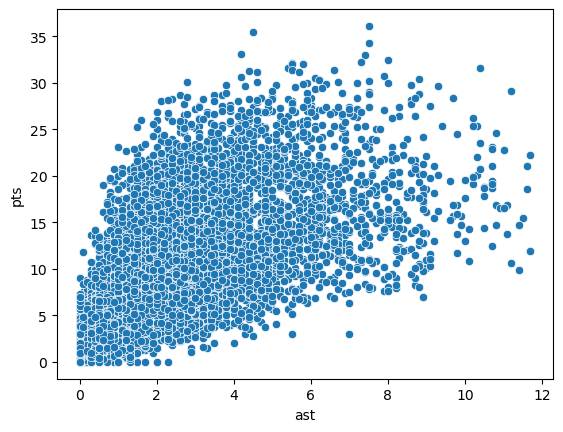

In [92]:
import seaborn as sns

sns.scatterplot(x= 'ast' , y='pts', data=c_df)

In [93]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [95]:
get_vif(features)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.0816, RMSE: 0.2856, R2: 0.9253



KeyboardInterrupt



In [9]:
# c_df = c_df.drop(labels=['team_abbreviation', 'player_weight', 'draft_number'], axis=1)
c_df['draft_round'] = c_df['draft_round'].astype(int)
c_df['team_abbreviation'] = c_df['team_abbreviation'].astype(int)
c_df['draft_number'] = c_df['draft_number'].astype(int)

In [97]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_abbreviation  12844 non-null  object 
 1   age                12844 non-null  float64
 2   player_height      12844 non-null  float64
 3   player_weight      12844 non-null  float64
 4   draft_round        12844 non-null  object 
 5   draft_number       12844 non-null  object 
 6   gp                 12844 non-null  int64  
 7   reb                12844 non-null  float64
 8   ast                12844 non-null  float64
 9   net_rating         12844 non-null  float64
 10  oreb_pct           12844 non-null  float64
 11  dreb_pct           12844 non-null  float64
 12  usg_pct            12844 non-null  float64
 13  ts_pct             12844 non-null  float64
 14  ast_pct            12844 non-null  float64
 15  pts                12844 non-null  float64
dtypes: float64(12), int64(

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 4.4127, RMSE: 2.1006, R2: 0.8778


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.0816, RMSE: 0.2856, R2: 0.9253


Exception ignored in: <function DMatrix.__del__ at 0x000001ABCF5DD120>
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py", line 909, in __del__
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

In [ ]:
get_vif(features)

In [ ]:
c_df = c_df.drop(labels=['age'], axis=1)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [l_r, dt_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

LinearRegression
MSE: 0.0995, RMSE: 0.3154, R2: 0.9089
DecisionTreeRegressor
MSE: 0.0816, RMSE: 0.2856, R2: 0.9253
GradientBoostingRegressor
MSE: 0.0310, RMSE: 0.1761, R2: 0.9716
XGBRegressor
MSE: 0.0212, RMSE: 0.1455, R2: 0.9806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2094
[LightGBM] [Info] Number of data points in the train set: 10275, number of used features: 15
[LightGBM] [Info] Start training from score 2.552759
LGBMRegressor
MSE: 0.0175, RMSE: 0.1325, R2: 0.9839


In [13]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    pts   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          6.279e+04
Date:                Wed, 15 May 2024   Prob (F-statistic):                        0.00
Time:                        22:20:53   Log-Likelihood:                         -3592.8
No. Observations:               12844   AIC:                                      7216.
Df Residuals:                   12829   BIC:                                      7327.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [14]:
get_vif(features)

NameError: name 'get_vif' is not defined

In [24]:
c_df.corr()['pts'].sort_values(ascending=False)[1:]

ast              0.664320
usg_pct          0.641469
reb              0.624509
gp               0.536003
ts_pct           0.373439
ast_pct          0.337339
net_rating       0.215199
dreb_pct         0.055669
player_height   -0.055284
oreb_pct        -0.125164
draft_round     -0.315555
Name: pts, dtype: float64

먼저 수치 확인

In [114]:
from sklearn.preprocessing import PowerTransformer

ccc = c_df.columns

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)


for i in ccc:
    result = ptf.fit_transform(c_df[[i]])
    c_df[i] = result



In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.5, random_state=124)


l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [l_r, dt_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
print(l_r.__class__.__name__)
get_evaluation(y_test, prediction)

LinearRegression
MSE: 0.0995, RMSE: 0.3154, R2: 0.9089


MSE: 0.1027, RMSE: 0.3205, R2: 0.9068
MSE: 0.0995, RMSE: 0.3154, R2: 0.9089


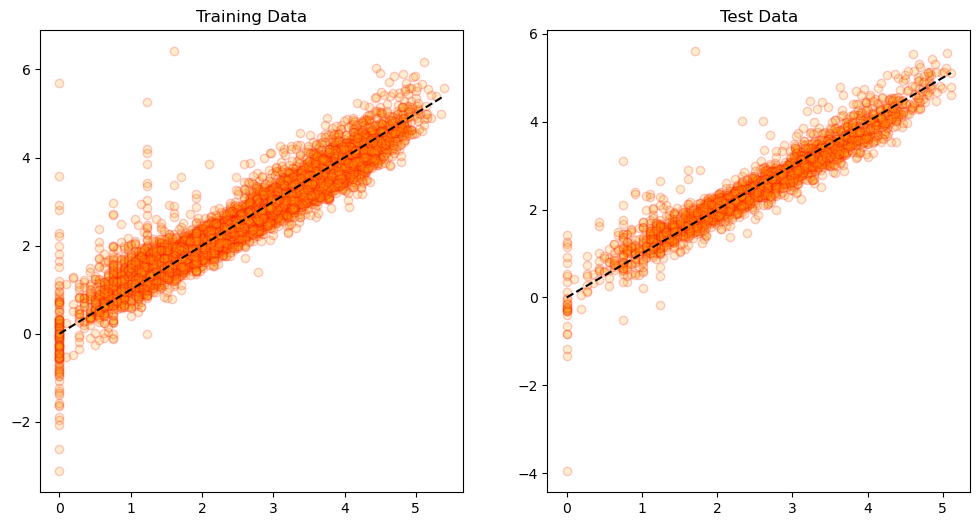

In [64]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
l_r.fit(X_train, y_train)
prediction_train = l_r.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
l_r.fit(X_train, y_train)
prediction_test = l_r.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


MSE: 0.0041, RMSE: 0.0643, R2: 0.9962
MSE: 0.0212, RMSE: 0.1455, R2: 0.9806


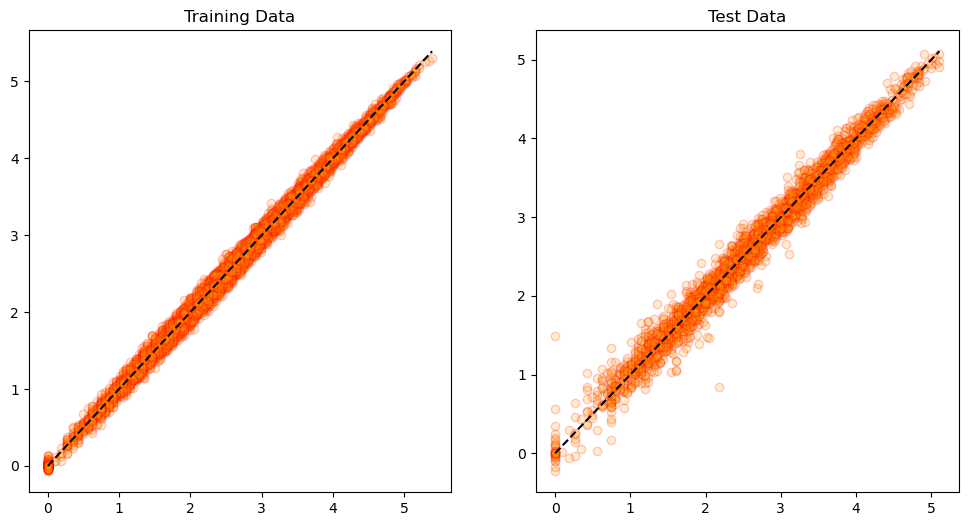

In [144]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
xgb_r.fit(X_train, y_train)
prediction_train = xgb_r.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
xgb_r.fit(X_train, y_train)
prediction_test = xgb_r.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


차원축소 한거 안한거 비교하게 만듭시다.

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

p_l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=4000, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [ridge,]
for model in models:
    pipe = Pipeline([('std', StandardScaler()),(f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

Ridge
MSE: 0.1526, RMSE: 0.3906, R2: 0.8603


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 10275, number of used features: 2
[LightGBM] [Info] Start training from score 2.552759
MSE: 0.2398, RMSE: 0.4897, R2: 0.7824
MSE: 0.0995, RMSE: 0.3154, R2: 0.9089


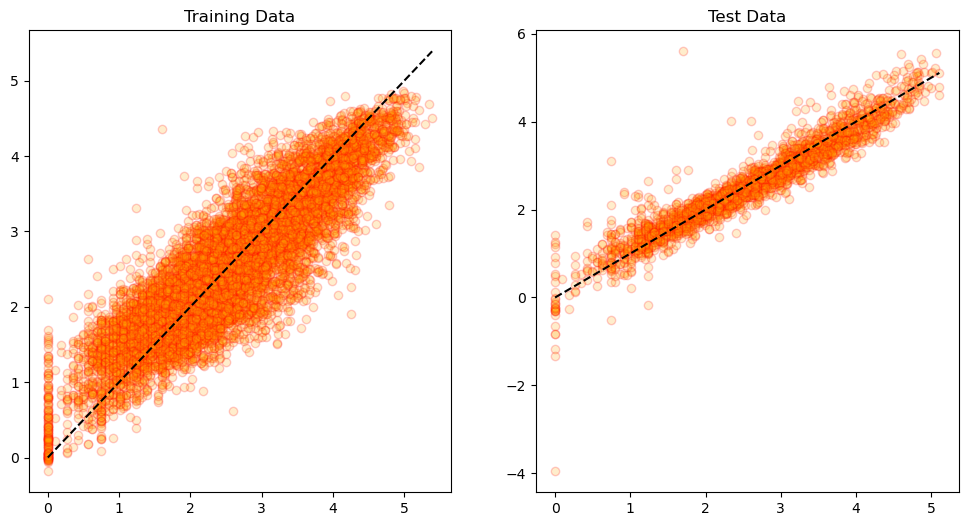

In [32]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
pipe.fit(X_train, y_train)
prediction_train = pipe.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
p_l_r.fit(X_train, y_train)
prediction_test = l_r.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


MSE: 0.2689, RMSE: 0.5185, R2: 0.7560
MSE: 0.2747, RMSE: 0.5241, R2: 0.7484


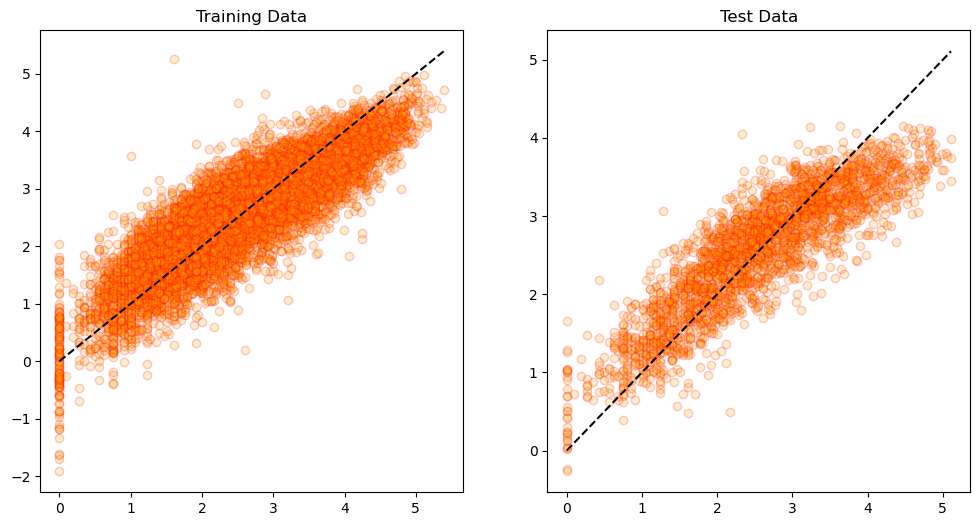

In [186]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
pipe.fit(X_train, y_train)
prediction_train = pipe.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
ridge.fit(X_train, y_train)
prediction_test = ridge.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.5, random_state=124)


p_l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=100000, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [p_l_r, ]
for model in models:
    pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=2)), (f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

NameError: name 'c_df' is not defined

In [20]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=124)
# ridge = Ridge(alpha=1000, random_state=124) 
score = cross_val_score(l_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))
print(get_evaluation(y_test_val, prediction))

[0.89568682 0.91366297 0.85589232 0.88187984 0.9127855  0.91655212
 0.91816622 0.92209148 0.92649148 0.90050411]
0.9044


In [18]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0995, RMSE: 0.3154, R2: 0.9089


In [19]:
l_r.fit(X_train_val, y_train_val)
prediction = l_r.predict(X_test_val)
get_evaluation(y_test_val, prediction)

MSE: 0.1156, RMSE: 0.3399, R2: 0.8926


In [34]:
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from torch.nn import Linear

torch.manual_seed(124)

features, targets = c_df.iloc[:,:-1],c_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=124)

real_X_train, val_X_test, real_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.5, random_state=124)

real_X_train = torch.FloatTensor(X_train.values)
real_y_train = torch.FloatTensor(y_train.values).view(-1, 1)

val_X_test = torch.FloatTensor(X_test.values)
val_y_test = torch.FloatTensor(y_test.values).view(-1, 1)
l_r = Linear(real_X_train.shape[1], 1)  # 입력 차원 동적 할당
optimizer = SGD(l_r.parameters(), lr=10000)  # 보다 실용적인 학습률

epochs = 10000  # 적절한 에포크 수
real_train_loss_history = []
val_test_loss_history = []

for epoch in range(1, epochs + 1):
    l_r.train()
    H = l_r(real_X_train)
    train_loss = mse_loss(real_y_train, H)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    l_r.eval()
    with torch.no_grad():
        H_test = l_r(val_X_test)
        test_loss = mse_loss(val_y_test, H_test)
        r2 = r2_score(val_y_test, H_test)
    
    real_train_loss_history.append(train_loss.item())
    val_test_loss_history.append(test_loss.item())

    # if epoch % 10000 == 0:
    #     print(f'{epoch}/{epochs}: ', end='')
    #     W = l_r.weight.data.squeeze()
    #     b = l_r.bias.data
    #     for i, w in enumerate(W):
    #         print(f'W{i+1}: {w:.4f}, ', end='')
    #     print(f'b: {b.item():.4f}, Loss: {train_loss.item():.4f}\n')
    if epoch % 10000 == 0:
        print(f'{epoch}/{epochs}: ', end='')
        W = l_r.weight.data.squeeze()
        b = l_r.bias.data
        for i, w in enumerate(W):
            print(f'W{i+1}: {w:.4f}, ', end='')
        print(f'b: {b.item():.4f}, Loss: {test_loss.item():.4f}\n')
        print(f'Test Loss: {test_loss.item():.4f}, R-squared: {r2.item():.4f}')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


ValueError: Input contains NaN.

In [33]:
c_df.dropna(inplace=True)  # NaN 값을 포함하는 행을 삭제합니다.


In [59]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train_val = torch.FloatTensor(X_train_val.values)
y_train_val = torch.FloatTensor(y_train_val.values).view(-1, 1)

X_test_val = torch.FloatTensor(X_test_val.values)
y_test_val = torch.FloatTensor(y_test_val.values).view(-1, 1)

train_losses = []
val_losses = []

# W_train = torch.nn.Parameter(torch.FloatTensor(l_r.coef_))
# b_train = torch.nn.Parameter(torch.tensor(l_r.intercept_))
W_train = torch.zeros((15, 1), requires_grad=True)
b_train = torch.zeros(1, requires_grad=True)

W_val = torch.zeros((15, 1), requires_grad=True)
b_val = torch.zeros(1, requires_grad=True)

optimizer_train = SGD([W_train, b_train], lr=0.000001)
optimizer_val = SGD([W_val, b_val], lr=0.000001)


In [60]:
epochs = 100000

for epoch in range(1, epochs + 1):
    H_train = X_train_val.matmul(W_train) + b_train
    loss_train = torch.mean((y_train_val - H_train) ** 2)

    optimizer_train.zero_grad()
    loss_train.backward()
    optimizer_train.step()

    if epoch % 100 == 0:
        train_losses.append(loss_train.item())

    if epoch % 10000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_train[0].item(), W_train[1].item(), \
                    W_train[2].item(), W_train[3].item(), b_train.item(), loss_train.item()))

10000/100000: W1: -0.0009, W2: 0.0028, W3: 0.0102, W4: -0.0070, b: 0.0002, loss: 0.5900
20000/100000: W1: -0.0012, W2: 0.0032, W3: 0.0115, W4: -0.0100, b: 0.0003, loss: 0.5477
30000/100000: W1: -0.0013, W2: 0.0033, W3: 0.0120, W4: -0.0112, b: 0.0004, loss: 0.5123
40000/100000: W1: -0.0012, W2: 0.0032, W3: 0.0122, W4: -0.0119, b: 0.0005, loss: 0.4822
50000/100000: W1: -0.0012, W2: 0.0031, W3: 0.0124, W4: -0.0125, b: 0.0006, loss: 0.4565
60000/100000: W1: -0.0011, W2: 0.0029, W3: 0.0125, W4: -0.0129, b: 0.0006, loss: 0.4347
70000/100000: W1: -0.0011, W2: 0.0027, W3: 0.0126, W4: -0.0133, b: 0.0007, loss: 0.4160
80000/100000: W1: -0.0010, W2: 0.0026, W3: 0.0127, W4: -0.0136, b: 0.0008, loss: 0.4001
90000/100000: W1: -0.0010, W2: 0.0024, W3: 0.0127, W4: -0.0139, b: 0.0009, loss: 0.3865
100000/100000: W1: -0.0009, W2: 0.0022, W3: 0.0128, W4: -0.0142, b: 0.0010, loss: 0.3748


In [61]:
# 검증 데이터 세트 학습 수행
epochs = 100000

for epoch in range(1, epochs + 1):
    H_test = X_test_val.matmul(W_val) + b_val
    loss_test = torch.mean((y_test_val - H_test) ** 2)

    optimizer_val.zero_grad()
    loss_test.backward()
    optimizer_val.step()

    if epoch % 100 == 0:
        val_losses.append(loss_test.item())
        
    if epoch % 10000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_val[0].item(), W_val[1].item(), \
                    W_val[2].item(), W_val[3].item(), b_val.item(), loss_test.item()))

10000/100000: W1: -0.0004, W2: 0.0030, W3: 0.0108, W4: -0.0074, b: 0.0002, loss: 0.6050
20000/100000: W1: -0.0009, W2: 0.0034, W3: 0.0124, W4: -0.0107, b: 0.0003, loss: 0.5627
30000/100000: W1: -0.0011, W2: 0.0035, W3: 0.0129, W4: -0.0121, b: 0.0004, loss: 0.5276
40000/100000: W1: -0.0011, W2: 0.0033, W3: 0.0131, W4: -0.0128, b: 0.0005, loss: 0.4978
50000/100000: W1: -0.0012, W2: 0.0031, W3: 0.0133, W4: -0.0133, b: 0.0005, loss: 0.4723
60000/100000: W1: -0.0012, W2: 0.0029, W3: 0.0134, W4: -0.0137, b: 0.0006, loss: 0.4506
70000/100000: W1: -0.0012, W2: 0.0026, W3: 0.0134, W4: -0.0140, b: 0.0007, loss: 0.4321
80000/100000: W1: -0.0012, W2: 0.0024, W3: 0.0135, W4: -0.0143, b: 0.0008, loss: 0.4163
90000/100000: W1: -0.0012, W2: 0.0021, W3: 0.0135, W4: -0.0145, b: 0.0009, loss: 0.4027
100000/100000: W1: -0.0012, W2: 0.0018, W3: 0.0136, W4: -0.0147, b: 0.0009, loss: 0.3910


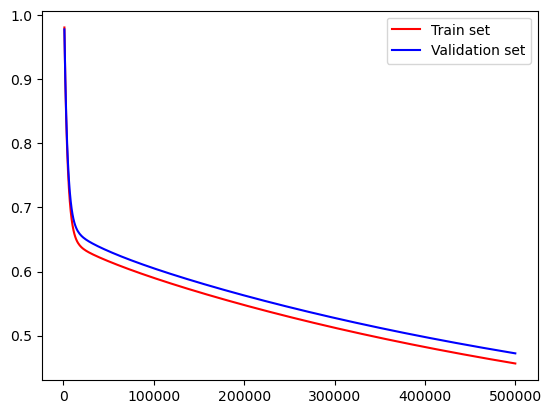

In [62]:
import matplotlib.pyplot as plt

train_loss_dict = dict()
val_loss_dict = dict()

for i in range(500):
    train_loss_dict[(i+1)*1000] = train_losses[i]
    val_loss_dict[(i+1)*1000] = val_losses[i]

plt.plot(train_loss_dict.keys(), train_loss_dict.values(), color='r', label='Train set')
plt.plot(val_loss_dict.keys(), val_loss_dict.values(), color='b', label='Validation set')
plt.legend()
plt.show()